## Introdução ao tema

A separação de terras raras é crucial para diversas indústrias, mas é também um processo complexo por causa das propriedades semelhantes entre esses elementos. Atualmente o método mais usado para a separação das terras raras em escala industrial é a extração por solvente, onde um ligante orgânico forma complexos com íons de terras raras específicos e as transfere para a fase orgânica. Em seguida, uma etapa de re-extração (com um ácido forte) recupera os elementos para uma solução aquosa purificada. O processo é repetido múltiplas vezes para atingir alto grau de pureza.

A eficácia de um ligante é geralmente medida pelo **coeficiente de distribuição**, que mostra a distribuição de um soluto (no nosso caso o íon de uma terra rara) entre as duas fases. Ele é cálculado pela seguinte fórmula:

<br>

$$D = \frac{C_{org}}{C_{aq}}$$

<br>
$D =$ coeficiente de distribuição

$C_{org} =$ concentração na fase orgânica

$C_{aq} =$ concentração na fase aquosa

---

**Um valor mais alto de D indica que um ligante é eficaz**


## O problema apresentado pelo artigo

O grande problema é que o processo de descobrir novos ligantes que criam complexos com as terras raras desejadas ainda é baseado em tentativa e erro, como diz o próprio artigo:


> "A descoberta de novos ligantes para aprimorar a separação de terras raras por extração por solvente, o processo mais prático de separação de terras raras, ainda se baseia amplamente em tentativa e erro, uma abordagem de baixo rendimento e ineficiente"



## Solução apresentada

O artigo propõe o uso de **redes neurais profundas** para prever os coeficientes de distribuição de **lantanídeos**, um grupo de 15 terras raras, antes mesmo de sintetizar os ligantes. Essa abordagem evita experimentos repetitivos e baseados em chutes. O treinamento da rede neural usa dados experimentais e conta com uma abordagem inovadora, onde os ligantes são representados por impressões digitais atômicas de conectividade estendida (**ECFPs**) e por descritores físico-químicos moleculares. Também é mostrado no artigo que essa estratégia teve sucesso fora das telas:


> "Sintetizamos quatro novos ligantes e descobrimos que os coeficientes de distribuição previstos pelo nosso modelo de aprendizado de máquina treinado correspondem bem aos valores medidos. Portanto, nossa abordagem de aprendizado de máquina abre caminho para acelerar a descoberta de novos ligantes para separações de terras raras"


## Entendendo o dataset

O conjunto de dados tem 2291 variáveis independentes e 1 variável dependente, chamada **log_D**. A referência de origem de cada ponto de dados de extração é rotulada na última coluna nos conjuntos de treinamento e validação, mas não é usada para aprendizado profundo.

In [ ]:
import pandas as pd
df = pd.read_excel('au2c00122_si_002.xlsx') # transformando os dados de treino na forma de dataframe

In [ ]:
df.head() # visualização básica da estrutura dos dados

,ECFP-1,ECFP-2,ECFP-3,ECFP-4,ECFP-5,ECFP-6,ECFP-7,ECFP-8,ECFP-9,ECFP-10,...,Second IE_metal (kJ/mol),Third IE_metal (kJ/mol),Electron Affinity_metal (kJ/mol),Atomic Radius_metal,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K),log_D,reference
0,0,0,0,0,0,0,0,0,0,0,...,1067.0,1850.3,48.0,1.87,2.08,1.10,1.030,56.9,0.477121,1
1,0,0,0,0,0,0,0,0,0,0,...,1046.9,1948.8,55.0,2.42,1.84,1.12,1.020,72.0,0.301030,1
2,0,0,0,0,0,0,0,0,0,0,...,1017.9,2086.4,92.8,2.40,1.90,1.13,0.990,73.9,0.477121,1
3,0,0,0,0,0,0,0,0,0,0,...,1034.3,2132.3,184.9,2.39,1.88,1.14,0.983,71.1,0.477121,1
4,0,0,0,0,0,0,0,0,0,0,...,1068.1,2257.8,15.6,2.36,1.85,1.17,0.958,69.5,0.477121,1


In [ ]:
df.shape # analisando a quantidade de linhas e colunas

(1085, 2293)

### Entendendo as linhas

O conjunto total tem 1202 linhas, mas o conjunto de treino só tem 1085. Dentre as 1202 linhas temos 109 ligantes, 14 lantanídeos como é explicado:


> "No total, 1.202 valores de D relatados usando 109 ligantes diferentes foram coletados da literatura e utilizados para construir o conjunto de dados. Cada Ln(III) possui mais de 60 entradas"

Para o conjunto de validação 117 pontos de dados de 1202 para 14 Ln(III)s foram selecionados aleatoriamente.

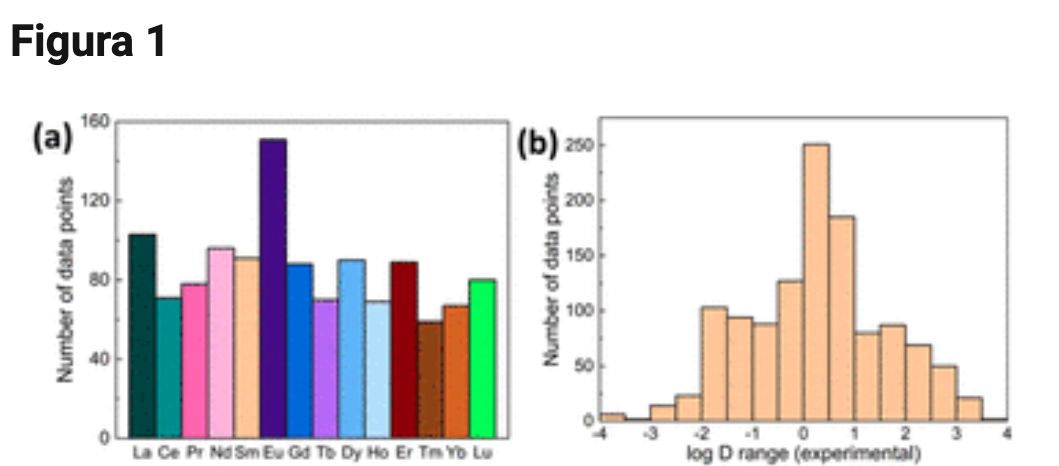

O eixo y do gráfico (a) mostra a quantidade de linhas que um elemento tem no dataset e o eixo x mostra o simbolo do elemento. Analisando o gráfico dá pra notar que o Európio aparece aproximadamente 150 vezes no dataset, enquanto o Cério aparece aproximadamente 70 vezes.

O gráfico (b), por sua vez, mostra no eixo y a quantidade de coeficientes de distribuição e em x o valor que eles têm. Com ele é possível ver que nesse conjunto os valores variam de -4 a +4, e aproximadamente 250 valores de D estão em torno de 0.

### Entendendo as colunas

As 2291 variáveis independentes se dividem em 3 grupos:

*   Descritores de lantanídeos (14 descritores)
*   Descritores de ligantes (208 descritores RDKit + 2048 ECFPs)
*   Condições experimentais (21 descritores)

Este [pdf](https://pubs.acs.org/doi/suppl/10.1021/jacsau.2c00122/suppl_file/au2c00122_si_001.pdf) mostra de forma mais detalhada quais são os descritores dos ligantes e das condições experimentais.

## Arquitetura do modelo

FCNNs (Redes neurais totalmente conectadas) foram escolhidas como o núcleo da abordagem no artigo. O modelo conta com 2291 entradas e três camadas ocultas com 512, 128 e 16 neurônios, respectivamente.

A função de ativação usada nos neurônios foi o **PReLU**. Diante de um conjunto de dados tão complexo ele oferece uma vantagem, já que ao invés de zerar qualquer valor de x igual ou menor que zero (como faz o ReLU), o PReLU retorna o valor multiplicado por um pequeno parâmetro aprendido.


*   ReLU: $f(x) =
\begin{cases}
x & \text{se } x \geq 0, \\
0 & \text{se } x < 0.
\end{cases}$

<br>

*   PReLU: $f(x) =
\begin{cases}
x & \text{se } x \geq 0, \\
a x & \text{se } x < 0.
\end{cases}$

Quanto aos hiperparâmetros, é mencionado que a taxa de aprendizado `lr` foi definida como 0.00001 e o decaimento de peso `weight_decay` como 0,01. Isso pode ser conferido na [Tabela S1](https://pubs.acs.org/doi/suppl/10.1021/jacsau.2c00122/suppl_file/au2c00122_si_001.pdf).

In [ ]:
# REPRESENTAÇÃO DO MODELO:

import torch
import torch.nn as nn
import torch.optim as optim

class FCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2291, 512)
        self.act1 = nn.PReLU()
        self.fc2 = nn.Linear(512, 128)
        self.act2 = nn.PReLU()
        self.fc3 = nn.Linear(128, 16)
        self.act3 = nn.PReLU()
        self.out = nn.Linear(16, 1)  # saída final

    def forward(self, X):
        X = self.act1(self.fc1(X))
        X = self.act2(self.fc2(X))
        X = self.act3(self.fc3(X))
        X = self.out(X)
        return X

model = FCNN()
criterion = nn.MSELoss()
otimizador = optim.Adam(model.parameters(), lr=0.00001, weight_decay=0.01)

### Treinamento

O treinamento do modelo foi feito com a biblioteca **Pytorch**, amplamente utilizada nesse contexto. Em cada época, 80% dos 1.085 pontos de dados foram selecionados aleatoriamente para treinamento.

No artigo é mostrado que foram testadas três abordagens para representar os ligantes no treinamento: o uso apenas de descritores do RDKit, o uso apenas de descritores ECFPs e por fim o uso de descritores ECFPs e ECFPs juntos. O resultado com a estratégia de usar usar descritores RDKit + ECFPs foi surpreendente; foi observado um R² de aproximadamente 0,80. Isso significa que o modelo conseguiu generalizar melhor os dados quando essa abordagem foi adotada. Após 5000 épocas foi visto que o modelo atingiu um **Erro Quadrático Médio** menor em comparação aos erros obtidos com o uso dos descritores de forma separada, como é mostrado nos gráficos:

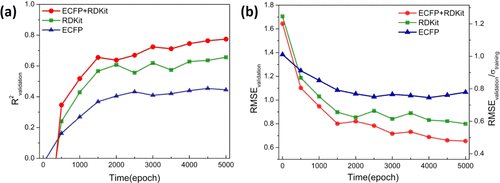

Os autores definiram essa estratégia como "inovadora", no que se refere a descoberta de novos ligantes com machine learning. Os mesmos admitiram:

> "Uma abordagem inovadora que empregamos é uma representação combinada de ligantes com descritores físico-químicos moleculares e impressões digitais atômicas de conectividade estendida, o que aumenta significativamente a precisão do modelo treinado."



### O que foi descoberto durante o treinamento

*   **Após 5000 épocas** modelos de três camadas ocultas apresentaram melhores previsões do que os de uma ou duas camadas
*   **Após 15000 épocas** um maior R² (0,85) foi alcançado, graças ao uso da função de ativação PReLU
*   Em um determinado momento o modelo conseguiu resultados ainda mais satisfatórios, tanto no treino quanto na validação:

      *   **Treino:** R²: 0.92, RMSE: 0.40, MAE: 0.19
      *   **Validação:** R²: 0.85, RMSE: 0.53, MAE: 0.34

Mas nem tudo foi um mar de rosas... na imagem abaixo é possível perceber que existem erros maiores para alguns valores previstos para log D:

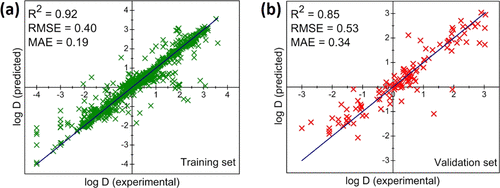

Foi descoberto que esses pontos estão relacionados a **ligantes com grupos raros** (como -SR), que não estão muito presentes nos dados de treinamento.

## Testes com ligantes sintetizados

Quatro novos ligantes, não presentes no dataset, foram sintetizados, dissolvidos em fase orgânica e colocados em contato com soluções aquosas mistas de lantanídeos em ácido clorídrico ou nítrico. As fases foram separadas e os valores de D foram determinados experimentalmente medindo a concentração aquosa de lantanídeos antes e depois da extração usando espectroscopia de emissão óptica de plasma indutivamente acoplada.

Os dados dos ligantes sintetizados, juntamente com as condições experimentais, foram passados para o modelo já treinado. O MAE entre as previsões do modelo e as observações experimentais de log D nos ligantes 1 a 4 foram 0.21, 0.41, 0.38 e 0.22, respectivamente, um desempenho semelhante com o obtido no conjunto de validação (com MAE igual a 0,34).

## Expandindo horizontes

O artigo menciona a possibilidade do modelo ser aprimorado e usado em contextos ainda mais amplos, o que traria ainda mais avanços na separação de terras raras. As principais possibilidades descritas foram:



1.   Incorporar mais dados ao conjunto de dados para aumentar a precisão do modelo em ligantes que não foram explorados pelos autores, como ligantes baseados em biomoléculas e materiais biogênicos

2.   Usar a abordagem para prever as melhores condições também é uma alternativa, porém os autores adicionam uma importante ressalva: pesquisadores tendem a relatar boas condições de extração, enquanto as condições menos desejáveis não são compartilhadas. **Em Data Science essa falta de diversidade nos dados traz grandes limitações**, e em modelos de machine learning dados enviasados trazem modelos que não generalizam bem. Apesar desse gargalo identificado os autores complementam:

> "Acreditamos que a experimentação automatizada e de alto rendimento das condições de extração aliviaria essa insuficiência e tornaria o esforço futuro de prever condições ótimas de extração com aprendizado de máquina altamente compensador."

## O que foi possível concluir

Em resumo, o artigo relata um problema no processo de separação de terras raras por extração por solvente (a descoberta de ligantes mais eficazes é feita por tentativa e erro e isso é algo custoso e ineficiente). Em seguida o uso de FCNNs (Redes neurais totalmente conectadas) é apresentada como uma solução para prever o coeficiente de distribuição (log D) dos íons de lantanídeos antes do ligante ser sintetizados.

Um dataset com 2291 variáveis independentes (dividas entre descritores de ligantes, descritores de lantanídeos e condições experimentais) e 1 variável dependente é usado pra treinar o modelo. Ao decorrer do processo foi decoberto que:

<br>

*   Usar descritores RDKit + ECFPs para representar ligantes melhorou significativamente o desempenho do modelo.
*   A função de ativação PReLU trouxe um R² melhor (de 0,85) após 15000 épocas de treinamento.
*   Redes com só 1 ou 2 camadas ocultas tem desempenho inferior em comparação a uma rede com 3 camadas ocultas.
*   Ligantes que não estavam no dataset foram sintetizados e seus valores de D foram próximos dos que o modelo previu.
*   O modelo cometeu erros maiores em pontos relacionados a ligantes com grupos raros, que são escassos no dataset.

Também foi destacado o potencial que essa abordagem tem para ser expandida e aplicada em novos ligantes e até na descoberta de melhores condições de extração.

## Link para o artigo

[Advancing Rare-Earth Separation by Machine](https://pubs.acs.org/doi/10.1021/jacsau.2c00122?fig=fig3&ref=pdf#fig3)